## 뒤죽박죽인 유저 id와 아이템 id를 0부터 정렬하여 재구성하기

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 13 17:02:33 2023

@author: 박순혁
"""
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import squareform, pdist, cdist
from numpy.linalg import norm
from math import isnan, isinf
from tqdm import tqdm
import pandas as pd
import numpy as np
import pickle
import time
import math
import os

# MovieLens100K: u.data, item.txt 의 경로
data = pd.read_table('u.data',header=None, names=['uid','iid','r','ts'])
data = data.drop(columns=['ts'])
user = data.drop_duplicates(['uid']).reset_index(drop=True)
item_data = data.drop_duplicates(['iid']).reset_index(drop=True)

m_d = {}
for n, i in enumerate(item_data.iloc[:,1]):
    m_d[i] = n
item_data.iloc[:,0] = sorted(m_d.values())

i_to_n = []
for i in range(data.shape[0]):
    i_to_n.append(m_d[data.loc[i,'iid']])
data['iid'] = i_to_n    


u_d = {}
for n, i in enumerate(user.iloc[:,0]):
    u_d[i] = n
user.iloc[:,0] = sorted(u_d.values())

u_to_n = []
for u in range(data.shape[0]):
    u_to_n.append(u_d[data.loc[u,'uid']])
data['uid'] = u_to_n  

## stratify 방식으로 8:2 로 train, test 분류

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(data, data['uid'].values, test_size=0.2, shuffle=True, stratify=data['uid'].values, random_state=35)

trn_data = x_train.copy()
print(trn_data)
val_data = x_valid.copy()

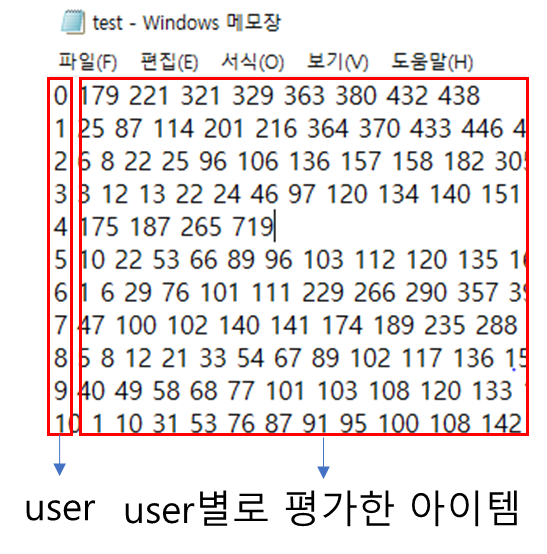

In [ ]:

with open(r'C:\Users\박순혁\OneDrive - seoultech.ac.kr\바탕 화면\대학원\그래프스터디\NGCF\Data\MovieLens100K\test.txt', 'w') as f :
    for u in range(len(val_data['uid'].unique())) :
        item = sorted(list(set(val_data['iid'][val_data['uid']==u].values)))
        u = str(u)
        item =' '.join(map(str, item))
        f.write(f'{u} {item}\n')
